In [3]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Path dataset split
output_base_path_aksarawa = r'D:\Proyek Aksara 2\Datasets_split_aksarabat'

# Memuat MobileNet sebagai model dasar (tanpa lapisan klasifikasi)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense untuk klasifikasi
predictions = Dense(19, activation='softmax')(x)  # 20 output classes

# Menggabungkan model dasar MobileNet dengan lapisan klasifikasi yang baru
model = Model(inputs=base_model.input, outputs=predictions)

# Menyatakan bahwa lapisan dasar MobileNet tidak akan dilatih
for layer in base_model.layers:
    layer.trainable = False

# Compile model dengan optimizer Adam dan loss function categorical crossentropy
model.compile(optimizer=Adam(learning_rate=1e-4),  # Menggunakan learning rate yang lebih rendah
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 64, 64, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 32, 32, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 32, 32, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 32, 32, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 32, 32, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,248,339 (12.39 MB)

 Trainable params: 19,475 (76.07 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [4]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksarawa, 'train')
test_dir = os.path.join(output_base_path_aksarawa, 'test')

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 1311 images belonging to 19 classes.
Found 589 images belonging to 19 classes.


In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Tahap pertama: Melatih layer awal dengan learning rate rendah
for layer in base_model.layers[:100]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),  # Menggunakan learning rate yang lebih rendah untuk layer awal
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(
    train_generator,
    epochs=30,  
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Tahap kedua: Melatih layer akhir dengan learning rate lebih tinggi
for layer in base_model.layers[100:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-4),  # Menggunakan learning rate yang lebih tinggi untuk layer akhir
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(
    train_generator,
    epochs=30, 
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/30


c:\Users\p\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.0639 - loss: 3.7062 - val_accuracy: 0.0577 - val_loss: 3.9870
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 935ms/step - accuracy: 0.1201 - loss: 3.1612 - val_accuracy: 0.0594 - val_loss: 3.6495
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2014 - loss: 2.6712 - val_accuracy: 0.0917 - val_loss: 3.3207
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.2753 - loss: 2.3364 - val_accuracy: 0.1630 - val_loss: 2.9656
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.4069 - loss: 1.9465 - val_accuracy: 0.2649 - val_loss: 2.5516
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.5142 - loss: 1.7168 - val_accuracy: 0.3582 - val_loss: 2.1842
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.5436 - loss: 1.6203 - val_accuracy: 0.4516 - val_loss: 1.8447
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.6182 - loss: 1.3444 - val_accuracy: 0.5637 - val_loss: 1.5

In [6]:
import matplotlib.pyplot as plt

history = {}
for key in history1.history.keys():
    history[key] = history1.history[key] + history2.history[key]

# Visualisasi hasil pelatihan
epochs = range(1, len(history['accuracy']) + 1)

plt.figure(figsize=(14, 5))


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

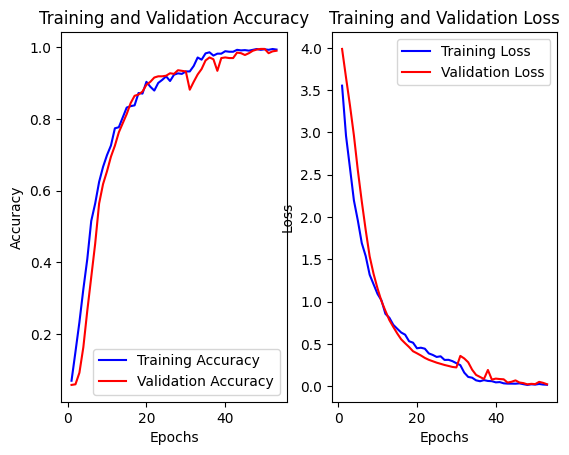

Final Training Accuracy: 0.9931
Final Validation Accuracy: 0.9898
Final Training Loss: 0.0179
Final Validation Loss: 0.0239


In [7]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Output final accuracy dan loss
final_train_accuracy = history['accuracy'][-1]
final_val_accuracy = history['val_accuracy'][-1]
final_train_loss = history['loss'][-1]
final_val_loss = history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


In [8]:
# # Save the model
model.save('AksaraBatakOptimizedVer1.h5')